# BBC NEws Classification 

In [1]:
# IMporting the libraries :

import csv 

import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Loading the Dataset :

with open (r'C:\Users\PMLS\Desktop\Personal\Coursera\NLP\BBC_News_classification\learn-ai-bbc\BBC News Train.csv' , 'r') as csvfile:
    
    print(f"First line (Header) Looks like this :\n\n       {csvfile.readline()}")
    
    print(f'Each Data point looks like this :\n\n           {csvfile.readline()}')

First line (Header) Looks like this :

       ArticleId,Text,Category

Each Data point looks like this :

           1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (Â£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in

# Filtering the Data

In [3]:
# Removing the Stopwords from the Data:

def remove_stopwords(sentence):
    
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

    sentence = sentence.lower()
    
    words = sentence.split()
    
    filtered_words = [word for word in words if word not in stopwords]
    
    sentence = ' '.join(filtered_words)
    
    return sentence
    

# Reading the Raw Data 

In [4]:
def parse_data_from_file(filename):
    
    sentences = []
    
    labels = []
    
    with open(filename , 'r') as csvfile :
        
        reader = csv.reader(csvfile)
        
        next(reader)    # Skipping the first row as it contains the labels
        
        for row in reader :
            
            sentence = remove_stopwords(row[1])
            
            label = row[2]
            
            sentences.append(sentence)
            
            labels.append(label)
            
    return sentences , labels
        

In [5]:
file = r'C:\Users\PMLS\Desktop\Personal\Coursera\NLP\BBC_News_classification\learn-ai-bbc\BBC News Train.csv'

sentences , labels = parse_data_from_file(file)

In [7]:
print(labels[0:5])

['business', 'business', 'business', 'tech', 'business']


In [9]:
sentences, labels = parse_data_from_file(file)

print("ORIGINAL DATASET:\n")

print(f"There are {len(sentences)} sentences in the dataset.\n")

print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")

print(f"There are {len(labels)} labels in the dataset.\n")

print(f"The first 5 labels are {labels[:5]}\n\n")

# With a miniature version of the dataset that contains only first 5 rows

mini_sentences, mini_labels = parse_data_from_file(file)

print("MINIATURE DATASET:\n")

print(f"There are {len(mini_sentences)} sentences in the miniature dataset.\n")

print(f"First sentence has {len(mini_sentences[0].split())} words (after removing stopwords).\n")

print(f"There are {len(mini_labels)} labels in the miniature dataset.\n")

print(f"The first 5 labels are {mini_labels[:5]}")

ORIGINAL DATASET:

There are 1490 sentences in the dataset.

First sentence has 203 words (after removing stopwords).

There are 1490 labels in the dataset.

The first 5 labels are ['business', 'business', 'business', 'tech', 'business']


MINIATURE DATASET:

There are 1490 sentences in the miniature dataset.

First sentence has 203 words (after removing stopwords).

There are 1490 labels in the miniature dataset.

The first 5 labels are ['business', 'business', 'business', 'tech', 'business']


# Tokenize Labels

In [10]:
def tokenizer_labels(labels):
    
    label_tokenizer = Tokenizer()
    
    label_tokenizer.fit_on_texts(labels)
    
    label_word_index = label_tokenizer.word_index
    
    label_sequences = label_tokenizer.texts_to_sequences(labels)
    
    return label_sequences , label_word_index

In [15]:
label_sequences , label_word_index = tokenizer_labels(labels)

print(label_sequences[0:5])

print(label_word_index)

[[2], [2], [2], [5], [2]]
{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}


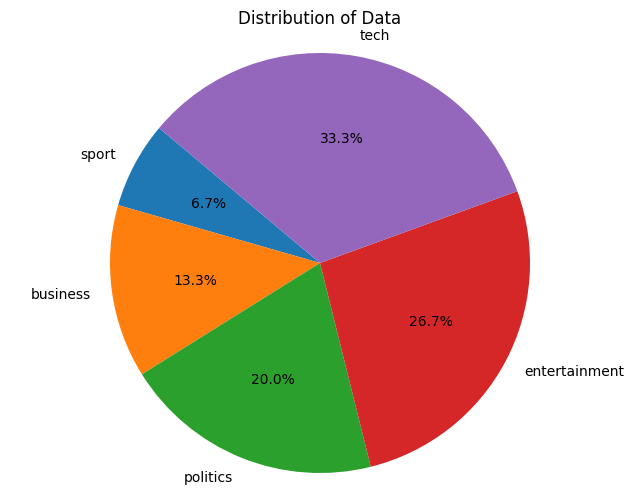

In [16]:
labels_graph = label_word_index.keys()

sizes = label_word_index.values()

plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels_graph, autopct='%1.1f%%', startangle=140)

plt.axis('equal') 

plt.title('Distribution of Data')

plt.show()

# Splitting the training and testing data 

In [17]:
def split_test_train_data(training_sentences , training_labels , training_split):
    
    
    train_size = int(len(training_sentences) * training_split)
    
    
    train_data = training_sentences[:train_size]
    train_labels = training_labels[:train_size]
    
    
    test_data = training_sentences[train_size:]
    test_labels = training_labels[train_size:]
    
    
    return train_data , train_labels , test_data , test_labels

In [18]:
train_sentences, train_labels, test_sentences, test_labels = split_test_train_data(sentences, labels, training_split=0.5)

print(f"There are {len(train_sentences)} sentences for training.\n")

print(f"There are {len(train_labels)} labels for training.\n")

print(f"There are {len(test_sentences)} sentences for validation.\n")

print(f"There are {len(test_labels)} labels for validation.")

There are 745 sentences for training.

There are 745 labels for training.

There are 745 sentences for validation.

There are 745 labels for validation.


# Tokenizer

In [ ]:
# parameters :

num_words = 1000

embedding_dim = 16

maxlen = 120

OOV_TOKEN = '<<OOV>>'

padding = 'post'

training_split = 0.5

In [ ]:
def fit_tokenizer(train_sentences , num_words , OOV_TOKEN):
    
    tokenizer = Tokenizer(num_words = num_words , oov_token = OOV_TOKEN)
    
    tokenizer.fit_on_texts(train_sentences)
    
    return(tokenizer)

In [ ]:
tokenizer = fit_tokenizer(train_sentences, num_words, OOV_TOKEN)

word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 18565 words

<OOV> token NOT included in vocabulary


# Padding

In [ ]:
def seq_and_pad(sentences , tokenizer ,  padding , maxlen):
    
    sequence = tokenizer.texts_to_sequences(sentences)
    
    padded_sequences = pad_sequences(sequence , padding = padding , maxlen = maxlen)
    
    return padded_sequences

In [ ]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, padding, maxlen)

val_padded_seq = seq_and_pad(test_sentences, tokenizer, padding, maxlen)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")

print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (745, 120)

Padded validation sequences have shape: (745, 120)


# Tokenize labels 

In [ ]:
def tokenize_labels(all_labels , split_labels):
    
    label_tokenizer = Tokenizer()
    
    label_tokenizer.fit_on_texts(all_labels)        # applying tokenizer
    
    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    
    label_seq_np = np.array(label_seq) - 1
    
    return label_seq_np

In [ ]:
train_label_seq = tokenize_labels(labels, train_labels)

val_label_seq = tokenize_labels(labels, test_labels)

# Model 

In [ ]:
def create_model(num_words, embedding_dim, maxlen):
    
    tf.random.set_seed(123)
    
    model = tf.keras.Sequential([
        
        tf.keras.layers.Embedding(input_dim = num_words , output_dim = embedding_dim , input_length = maxlen),
        
        tf.keras.layers.GlobalAveragePooling1D(),
        
        tf.keras.layers.Dense(24, activation='relu'),
        
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    
    model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
    
    
    return model

In [ ]:

model = create_model(num_words, embedding_dim, maxlen)

history = model.fit(train_padded_seq, train_label_seq, epochs=40, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/40
24/24 [==============================] - 1s 15ms/step - loss: 1.7865 - accuracy: 0.2094 - val_loss: 1.7755 - val_accuracy: 0.2591
Epoch 2/40
24/24 [==============================] - 0s 4ms/step - loss: 1.7648 - accuracy: 0.4188 - val_loss: 1.7544 - val_accuracy: 0.4282
Epoch 3/40
24/24 [==============================] - 0s 4ms/step - loss: 1.7390 - accuracy: 0.3906 - val_loss: 1.7282 - val_accuracy: 0.3624
Epoch 4/40
24/24 [==============================] - 0s 5ms/step - loss: 1.7046 - accuracy: 0.4322 - val_loss: 1.6938 - val_accuracy: 0.4107
Epoch 5/40
24/24 [==============================] - 0s 4ms/step - loss: 1.6600 - accuracy: 0.4617 - val_loss: 1.6508 - val_accuracy: 0.4282
Epoch 6/40
24/24 [==============================] - 0s 5ms/step - loss: 1.6061 - accuracy: 0.4537 - val_loss: 1.5980 - val_accuracy: 0.4282
Epoch 7/40
24/24 [==============================] - 0s 4ms/step - loss: 1.5393 - accuracy: 0.4658 - val_loss: 1.5367 - val_accuracy: 0.4282
Epoch 8/40
24/24 [=

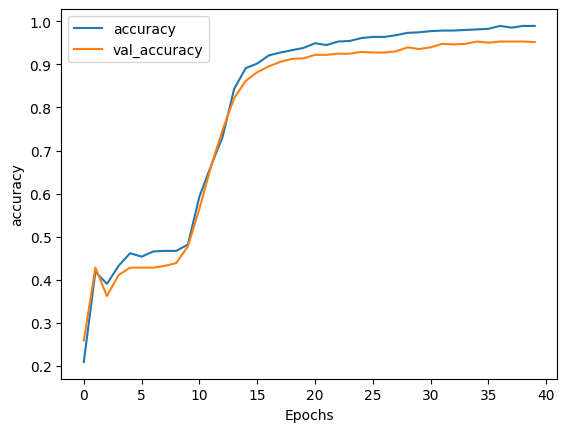

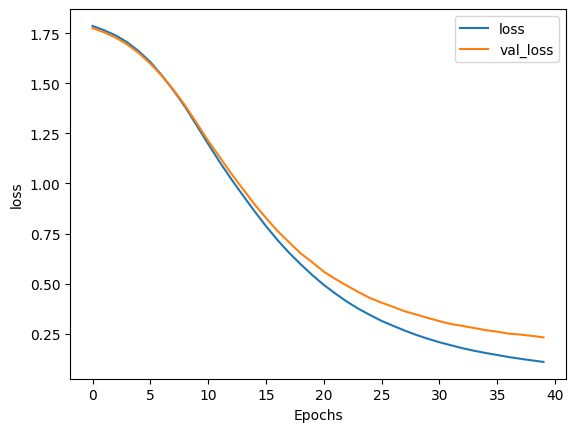

In [ ]:
def plot_graphs(history, metric):
    
    plt.plot(history.history[metric])
    
    plt.plot(history.history[f'val_{metric}'])
    
    plt.xlabel("Epochs")
    
    plt.ylabel(metric)
    
    plt.legend([metric, f'val_{metric}'])
    
    plt.show()
    
plot_graphs(history, "accuracy")

plot_graphs(history, "loss")